# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

To help determine the correlation between latitude and various factors related to weather, we looked at the maximum temperature, humidity(%), cloudiness(%), and wind speed (mph) in 598 randomly selected cities. Here are some early onservations from the data:

Latitude vs Maximum Temperature: 
    -Global View: The maximum temperature is higher in cities where the absolute value of the latitude is closer to zero. As the absolute value of latitde increases, the maximum temperature decreases.
    -Hemisphere Breakdown: The Northern Hemisphere has a strong negative correlation between Max Temp and Latitude, while a strong positive correlation exists between cities in the Southern Hemisphere and Maximum Temperature

Latitude vs. Humidity: 
    -Global View: There does not appear to be any significant correlation between the latitude of a city and the humidity percentage, but it appears the majority of the sampled cities have a humidity percentage of 60% or more.
    -Hemisphere Breakdown: There appears to be a positive correlation between latititude and humidity in the Northern Hemisphere vs a weak positive correlation in the Southern Hemisphere

Latitude vs Cloudiness: 
    -Global View: There does not appear to be any significant correlation between the latitude of a city and the cloudiness percentage
    -Hemisphere Breakdown: There is a much more positive correlation between Latitude and Cloudiness vs. the sampled cities in the Northern Hemisphere

Latitude vs. Wind Speed: 
    -Global View: There does not appear to be any significant correlation between the latitude of a city and the wind speed, but the  vast majority of the sampled cities have a wind speed of 15 mph or less.
    -Hemisphere Breakdown: There is a weak positive correlation between latitude and wind speed in the sampled cities in the Northern Hemisphere, vs a slight negative correlation among the Southern Hemisphere counterparts.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats

# Import API key
from api_keys import weather_api_key

today = pd.Timestamp('today')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
#Create dataframe framework for weather data
city_name = []
country = []
lat = []
lng = []
max_temperature = []
humidity = []
wind_speed = []
cloudiness = []
date = []
Hemisphere = []
 
#Create Counter for cities Print Log
city_count = 0

city_weather_data = pd.DataFrame({"City":city_name, "Country":country, "Latitude":lat, "Longitude": lng, "Max Temp.": max_temperature, "Humidity":humidity, "Wind Speed":wind_speed, "Cloudiness":cloudiness, "Date":date})
city_weather_data

,City,Country,Latitude,Longitude,Max Temp.,Humidity,Wind Speed,Cloudiness,Date


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = weather_api_key

# Base URL and Identify temperature units
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"

print(f"Start Open Weather Map API Call Process to Gather City Weather Data")

for city in cities:

# Build partial query URL
    query_url = f"{base_url}appid={weather_api_key}&q={city}&units={temp_units}"

#API Call
    response = requests.get(query_url).json()

#Add 1 to city count for print
    city_count = city_count + 1

#Control API request volume
    time.sleep(1)
   
    try: 
#Print record of data getting pulled for each city
        print(f"Processing API Record Number {city_count} for City: {city}")
        
#Append information to City Weather Dataframe              
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
    except:
        print("City information not found...moving to next city")

      
print("Open Weather Map API Call Process Complete")


Start Open Weather Map API Call Process to Gather City Weather Data
Processing API Record Number 1 for City: hilo
Processing API Record Number 2 for City: dukat
Processing API Record Number 3 for City: saint-pierre
Processing API Record Number 4 for City: albany
Processing API Record Number 5 for City: rikitea
Processing API Record Number 6 for City: bluff
Processing API Record Number 7 for City: victoria
Processing API Record Number 8 for City: norman wells
Processing API Record Number 9 for City: acapulco
Processing API Record Number 10 for City: camacha
Processing API Record Number 11 for City: airai
Processing API Record Number 12 for City: fairbanks
Processing API Record Number 13 for City: puerto ayora
Processing API Record Number 14 for City: attawapiskat
City information not found...moving to next city
Processing API Record Number 15 for City: jalingo
Processing API Record Number 16 for City: lagoa
Processing API Record Number 17 for City: saleaula
City information not found...

Processing API Record Number 152 for City: dali
Processing API Record Number 153 for City: tabiauea
City information not found...moving to next city
Processing API Record Number 154 for City: hofn
Processing API Record Number 155 for City: illoqqortoormiut
City information not found...moving to next city
Processing API Record Number 156 for City: rio grande
Processing API Record Number 157 for City: belem de sao francisco
Processing API Record Number 158 for City: avarua
Processing API Record Number 159 for City: college
Processing API Record Number 160 for City: beyneu
Processing API Record Number 161 for City: ati
Processing API Record Number 162 for City: boyolangu
Processing API Record Number 163 for City: salalah
Processing API Record Number 164 for City: vardo
Processing API Record Number 165 for City: ribeira grande
Processing API Record Number 166 for City: olenino
Processing API Record Number 167 for City: warqla
City information not found...moving to next city
Processing API 

Processing API Record Number 289 for City: tubuala
Processing API Record Number 290 for City: ndele
Processing API Record Number 291 for City: kilrush
Processing API Record Number 292 for City: saint-denis
Processing API Record Number 293 for City: san jeronimo
Processing API Record Number 294 for City: hazorasp
Processing API Record Number 295 for City: san ignacio
Processing API Record Number 296 for City: mackay
Processing API Record Number 297 for City: beringovskiy
Processing API Record Number 298 for City: tawkar
City information not found...moving to next city
Processing API Record Number 299 for City: jiuquan
Processing API Record Number 300 for City: minudasht
Processing API Record Number 301 for City: belaya gora
Processing API Record Number 302 for City: roald
Processing API Record Number 303 for City: barentsburg
City information not found...moving to next city
Processing API Record Number 304 for City: riberalta
Processing API Record Number 305 for City: fortuna
Processing

Processing API Record Number 441 for City: jieshi
Processing API Record Number 442 for City: juba
Processing API Record Number 443 for City: kampene
Processing API Record Number 444 for City: boyuibe
Processing API Record Number 445 for City: siavonga
Processing API Record Number 446 for City: klaksvik
Processing API Record Number 447 for City: kuznechnoye
Processing API Record Number 448 for City: ballinasloe
Processing API Record Number 449 for City: aljezur
Processing API Record Number 450 for City: quesnel
Processing API Record Number 451 for City: mayumba
Processing API Record Number 452 for City: lodwar
Processing API Record Number 453 for City: neuquen
Processing API Record Number 454 for City: semibratovo
Processing API Record Number 455 for City: sao raimundo nonato
Processing API Record Number 456 for City: madaba
Processing API Record Number 457 for City: marrakesh
Processing API Record Number 458 for City: boddam
Processing API Record Number 459 for City: meulaboh
Processin

Processing API Record Number 591 for City: vizinga
Processing API Record Number 592 for City: rawson
Processing API Record Number 593 for City: saint-francois
Processing API Record Number 594 for City: verkhnyaya inta
Processing API Record Number 595 for City: gazojak
Processing API Record Number 596 for City: unye
City information not found...moving to next city
Processing API Record Number 597 for City: kudahuvadhoo
Processing API Record Number 598 for City: saint marys
Open Weather Map API Call Process Complete


ValueError: Format 'txt' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

<Figure size 432x288 with 0 Axes>

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dictionary for all data pulled from Weather API
city_weather_dict = {"City":city_name, "Country":country, "Latitude":lat, "Longitude": lng, "Max Temp.": max_temperature, "Humidity":humidity, "Wind Speed":wind_speed, "Cloudiness":cloudiness, "Date":date}

#Add Dictionary Data into Dataframe created above

city_weather_data = pd.DataFrame(city_weather_dict)

#Create column to determine Northern or Southern Hemisphere based on latitude value
city_weather_data["Hemisphere"] = np.where(city_weather_data["Latitude"]>=0, 'Northern Hemisphere', 'Southern Hemisphere')
city_weather_data.head()

,City,Country,Latitude,Longitude,Max Temp.,Humidity,Wind Speed,Cloudiness,Date,Hemisphere
0,Hilo,US,19.73,-155.09,78.80,65,4.70,90,1586395577,Northern Hemisphere
1,Dukat,RU,62.55,155.55,19.38,88,5.59,86,1586395728,Northern Hemisphere
2,Saint-Pierre,RE,-21.34,55.48,77.00,73,8.05,0,1586395729,Southern Hemisphere
3,Albany,US,42.60,-73.97,53.60,54,14.99,75,1586395731,Northern Hemisphere
4,Rikitea,PF,-23.12,-134.97,76.60,80,9.86,90,1586395732,Southern Hemisphere


In [6]:
#Export Data to CSV File

city_weather_data.to_csv('output_data/city_weather_datafile.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

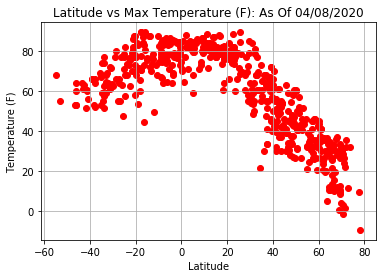

In [7]:
#Create Latitude vs Temp Scatter Plot

plt.scatter(city_weather_data["Latitude"],city_weather_data["Max Temp."],c='r')

#Create Chart Title and Axis Titles

plt.title(f"Latitude vs Max Temperature (F): As Of {today:%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig('output_data/Latitude vs Max Temp.png')
          
#Show Scatter Plot
          
plt.show()
                                                

The maximum temperature is higher in cities where the absolute value of the latitude is closer to zero. As the absolute value of latitde increases, the maximum temperature decreases.

#### Latitude vs. Humidity Plot

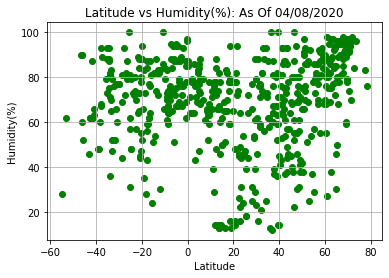

In [8]:
#Create Latitude vs Humidity Scatter Plot

plt.scatter(city_weather_data["Latitude"],city_weather_data["Humidity"],c='g')

#Create Chart Title and Axis Titles

plt.title(f"Latitude vs Humidity(%): As Of {today:%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig('output_data/Latitude vs Humidity.png')
          
#Show Scatter Plot
          
plt.show()

There does not appear to be any significant correlation between the latitude of a city and the humidity percentage, but it appears the majority of the sampled cities have a humidity percentage of 60% or more.

#### Latitude vs. Cloudiness Plot

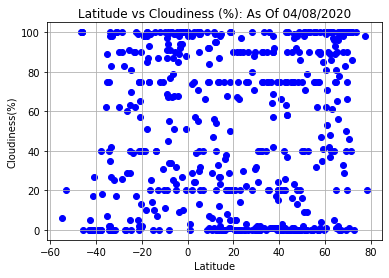

In [9]:
#Create Latitude vs Cloudiness Scatter Plot

plt.scatter(city_weather_data["Latitude"],city_weather_data["Cloudiness"],c='b')

#Create Chart Title and Axis Titles

plt.title(f"Latitude vs Cloudiness (%): As Of {today:%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig('output_data/Latitude vs Cloudiness.png')
          
#Show Scatter Plot
          
plt.show()

There does not appear to be any significant correlation between the latitude of a city and the cloudiness percentage

#### Latitude vs. Wind Speed Plot

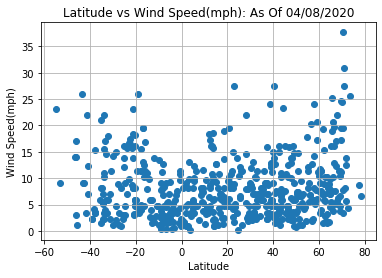

In [10]:
#Create Latitude vs Wind Speed Scatter Plot

plt.scatter(city_weather_data["Latitude"],city_weather_data["Wind Speed"])

#Create Chart Title and Axis Titles

plt.title(f"Latitude vs Wind Speed(mph): As Of {today:%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig('output_data/Latitude vs Wind Speed.png')
          
#Show Scatter Plot
          
plt.show()

There does not appear to be any significant correlation between the latitude of a city and the wind speed, but the  vast majority of the sampled cities have a wind speed of 15 mph or less.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames

city_weather_data_northern = city_weather_data.loc[city_weather_data["Hemisphere"] == "Northern Hemisphere"]
city_weather_data_southern = city_weather_data.loc[city_weather_data["Hemisphere"] == "Southern Hemisphere"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

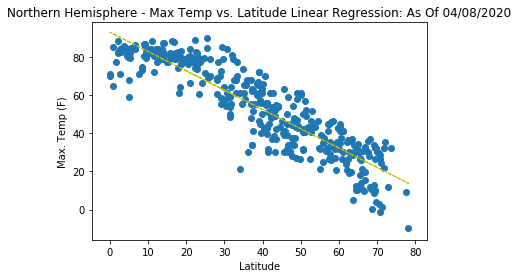

In [21]:
#Identify latitude in Nothern Hemisphere dataframe
lat_northern = city_weather_data_northern.iloc[:,2]

#Identify Max temp in dataframe
max_temp_northern = city_weather_data_northern.iloc[:,4]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_northern, max_temp_northern)
vc_fit = vc_slope * lat_northern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_northern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_northern,max_temp_northern)
plt.xlabel('Latitude')
plt.ylabel('Max. Temp (F)')
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File
          
plt.savefig('output_data/Max Temp vs Latitude Linear Regression - Northern Hemisphere.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

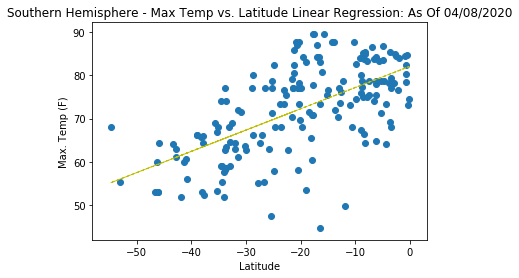

In [22]:
#Identify latitude in Southern Hemisphere dataframe
lat_southern = city_weather_data_southern.iloc[:,2]

#Identify Max temp in dataframe
max_temp_southern = city_weather_data_southern.iloc[:,4]

#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_southern, max_temp_southern)
vc_fit = vc_slope * lat_southern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_southern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_southern,max_temp_southern)
plt.xlabel('Latitude')
plt.ylabel('Max. Temp (F)')
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Max Temp vs Latitude Linear Regression - Southern Hemisphere.png')

plt.show()

Hemisphere Max Temp vs Latitude Analysis: The Northern Hemisphere has a strong negative correlation between Max Temp and Latitude, while a strong positive correlation exists between cities in the Southern Hemisphere and Maximum Temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

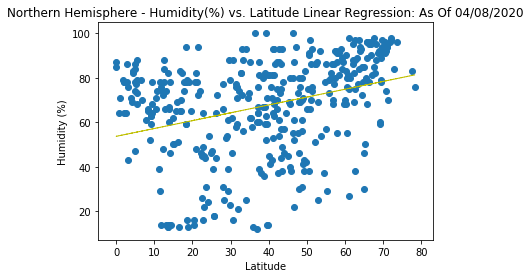

In [23]:
#Identify latitude in Nothern Hemisphere dataframe
lat_northern = city_weather_data_northern.iloc[:,2]

#Identify Max temp in dataframe
humidity_northern = city_weather_data_northern.iloc[:,5]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_northern, humidity_northern)
vc_fit = vc_slope * lat_northern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_northern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_northern,humidity_northern)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Humidity vs Latitude Linear Regression - Northern Hemisphere.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

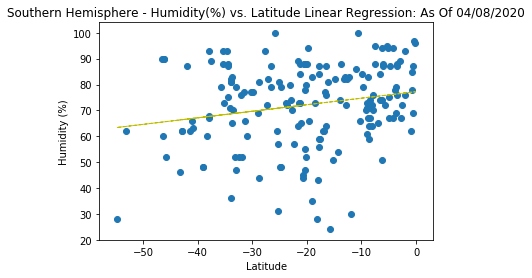

In [24]:
#Identify latitude in Southern Hemisphere dataframe
lat_southern = city_weather_data_southern.iloc[:,2]

#Identify Max temp in dataframe
humidity_southern = city_weather_data_southern.iloc[:,5]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_southern, humidity_southern)
vc_fit = vc_slope * lat_southern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_southern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_southern,humidity_southern)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Humidity vs Latitude Linear Regression - Southern Hemisphere.png')

plt.show()

There appears to be a positive correlation between latititude and humidity in the Northern Hemisphere vs a weak positive correlation in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

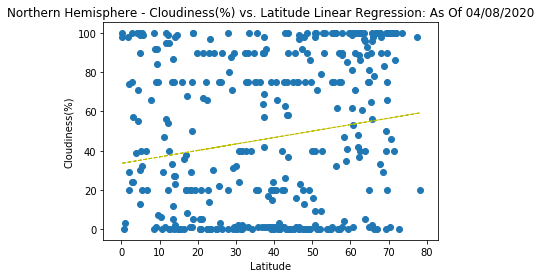

In [25]:
#Identify latitude in Nothern Hemisphere dataframe
lat_northern = city_weather_data_northern.iloc[:,2]

#Identify Max temp in dataframe
cloudiness_northern = city_weather_data_northern.iloc[:,7]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_northern, cloudiness_northern)
vc_fit = vc_slope * lat_northern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_northern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_northern,cloudiness_northern)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Cloudiness vs Latitude Linear Regression - Northern Hemisphere.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

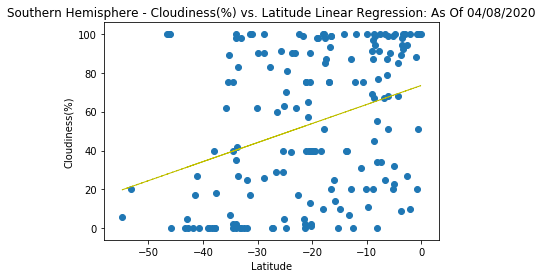

In [26]:
#Identify latitude in Nothern Hemisphere dataframe
lat_southern = city_weather_data_southern.iloc[:,2]

#Identify Max temp in dataframe
cloudiness_southern = city_weather_data_southern.iloc[:,7]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_southern, cloudiness_southern)
vc_fit = vc_slope * lat_southern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_southern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_southern,cloudiness_southern)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Cloudiness vs Latitude Linear Regression - Southern Hemisphere.png')

plt.show()

There is a much more positive correlation between Latitude and Cloudiness vs. the sampled cities in the Northern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

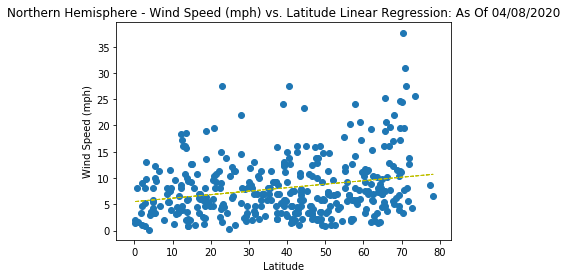

In [27]:
#Identify latitude in Nothern Hemisphere dataframe
lat_northern = city_weather_data_northern.iloc[:,2]

#Identify Max temp in dataframe
wind_speed_northern = city_weather_data_northern.iloc[:,6]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_northern, wind_speed_northern)
vc_fit = vc_slope * lat_northern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_northern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_northern,wind_speed_northern)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Wind Speed vs Latitude Linear Regression - Northern Hemisphere.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

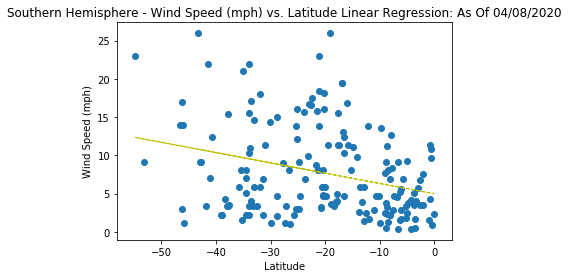

In [28]:
#Identify latitude in Nothern Hemisphere dataframe
lat_southern = city_weather_data_southern.iloc[:,2]

#Identify Max temp in dataframe
wind_speed_southern = city_weather_data_southern.iloc[:,6]


#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(lat_southern, wind_speed_southern)
vc_fit = vc_slope * lat_southern + vc_int

#Create scatter plot and best fit line graph

plt.plot(lat_southern,vc_fit,"--",linewidth=1, color="y")
plt.scatter(lat_southern,wind_speed_southern)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: As Of {today:%m/%d/%Y}")

#Save chart as .PNG File

plt.savefig('output_data/Wind Speed vs Latitude Linear Regression - Southern Hemisphere.png')

plt.show()

There is a weak positive correlation between latitude and wind speed in the sampled cities in the Northern Hemisphere, vs a slight negative correlation among the Southern Hemisphere counterparts.